In [1]:
import pandas as pd
import numpy as py

In [2]:
music = pd.read_csv("music_train.csv")

In [3]:
music.head()

,id,release_date,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic,genre
0,0,2014.0,0.001049,0.000254,0.078057,0.282523,0.000000,0.000654,1.109899,3.484935,...,0.001021,0.673433,0.753102,0.002560,0.001046,0.040567,48.364265,0.085714,2.0,4
1,1,1962.0,0.059132,NaN,NaN,0.001836,0.000737,0.000000,0.758840,0.000000,...,0.001697,0.690740,0.678925,0.785480,0.001009,0.743203,28.200609,0.828571,7.0,1
2,2,1969.0,0.027451,0.085989,0.039760,0.001288,0.001424,0.000857,0.545408,0.016914,...,0.000000,0.186294,0.404628,0.890527,0.060886,0.093003,13.145639,0.728571,NaN,4
3,3,2004.0,0.050993,NaN,0.000000,0.000477,0.008157,0.002800,0.000000,0.003703,...,0.067061,0.499643,0.685085,0.640129,0.163850,0.648084,62.663152,0.228571,5.0,0
4,4,1992.0,0.000551,0.028702,0.000000,0.069748,0.008735,0.000625,0.014364,0.253022,...,0.000000,0.407141,0.616982,0.030576,NaN,NaN,48.641741,0.400000,1.0,1


In [4]:
#music.shape

In [5]:
#music.info()

In [6]:
#music['genre'].value_counts()

In [7]:
#music.describe()

In [8]:
#music['communication'].value_counts()

## Plotting the graphs, pairplots and heat maps to visualize the data

In [9]:
corr_matrix =music.corr()
corr_matrix['genre'].sort_values(ascending=False)

genre                       1.000000
energy                      0.189293
loudness                    0.131997
release_date                0.085711
violence                    0.085037
topic                       0.068553
danceability                0.037557
world/life                  0.036645
instrumentalness            0.026871
obscene                     0.017449
family/spiritual            0.016977
shake the audience          0.014632
communication               0.011004
light/visual perceptions    0.006929
like/girls                  0.006015
feelings                    0.004042
night/time                 -0.002403
dating                     -0.008180
sadness                    -0.011327
valence                    -0.011414
family/gospel              -0.014790
id                         -0.021849
romantic                   -0.027653
movement/places            -0.036028
music                      -0.047214
age                        -0.084453
acousticness               -0.207499
N

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

## dropping the id and the release_date column since are not effective in deciding the genre of the music

In [12]:
music = music.drop("id", axis=1)

In [13]:
music = music.drop("release_date", axis=1)

In [14]:

#import seaborn as sns
#sns.pairplot(music,hue='genre')

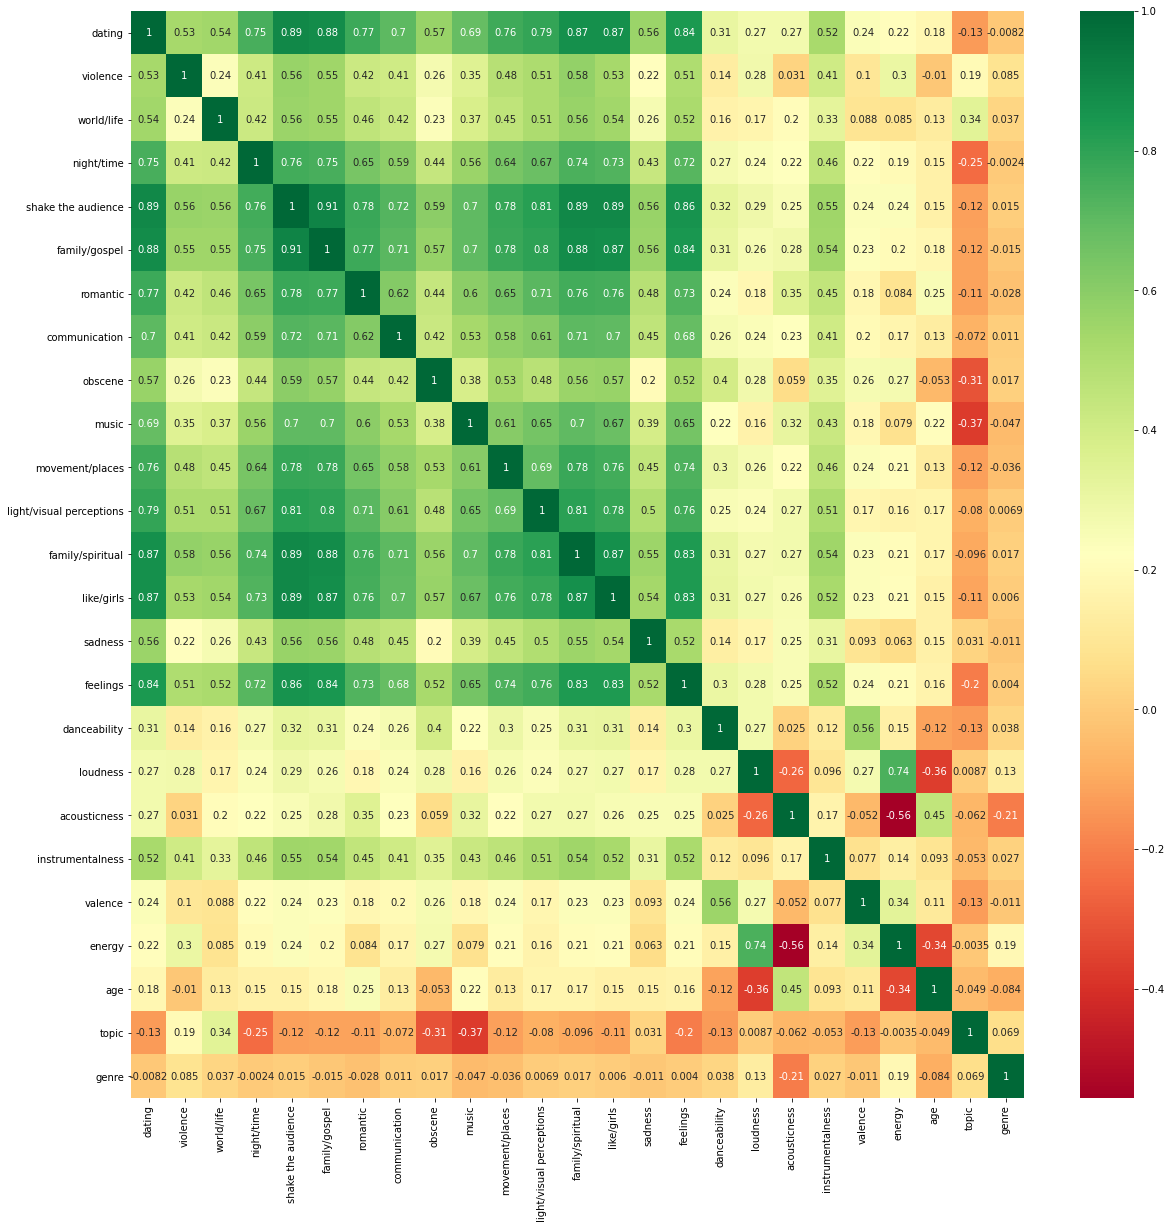

In [15]:
import seaborn as sns
corrmat = music.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(music[top_corr_features].corr(),annot = True,cmap='RdYlGn')

## Using imputer to fill up the missing datas with the median of the respective columns of  each feature

In [16]:
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(strategy = "median")
imputer.fit(music)

SimpleImputer(strategy='median')

In [17]:
X =imputer.transform(music)

In [18]:
preprocessing_set = pd.DataFrame(X, columns=music.columns)

In [19]:
preprocessing_set.describe()    # to show that now no NaN value is present in the data

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic,genre
count,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,...,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000
mean,0.042192,0.138409,0.141975,0.074264,0.040091,0.042501,0.661468,0.986340,1.108280,0.841569,...,0.050565,0.547884,0.675064,0.356205,0.094241,0.525108,56.003541,0.437767,4.528659,2.946965
std,0.154477,0.221679,0.216602,0.176604,0.154871,0.154039,1.733680,1.762949,2.182149,1.878861,...,0.159350,0.184530,0.131369,0.330921,0.240796,0.258231,25.219311,0.259731,1.964244,2.036571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000
25%,0.000489,0.001584,0.001876,0.000771,0.000606,0.001072,0.006831,0.016104,0.007228,0.012463,...,0.000718,0.433276,0.609524,0.045411,0.000044,0.321610,36.843080,0.214286,3.000000,1.000000
50%,0.001606,0.004364,0.021138,0.002307,0.001728,0.002596,0.021249,0.045014,0.020343,0.031412,...,0.002046,0.551020,0.690477,0.250711,0.001081,0.527245,56.730710,0.435714,5.000000,3.000000
75%,0.004251,0.221194,0.218735,0.060784,0.010311,0.007400,0.385146,1.440751,0.913902,0.656836,...,0.029558,0.666664,0.758184,0.655972,0.008059,0.730723,76.485258,0.642857,6.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,7.000000,6.000000


In [20]:
preprocessing_set.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic,genre
0,0.001049,0.000254,0.078057,0.282523,0.000000,0.000654,1.109899,3.484935,0.360515,0.016644,...,0.001021,0.673433,0.753102,0.002560,0.001046,0.040567,48.364265,0.085714,2.0,4.0
1,0.059132,0.004364,0.021138,0.001836,0.000737,0.000000,0.758840,0.000000,0.018112,0.658993,...,0.001697,0.690740,0.678925,0.785480,0.001009,0.743203,28.200609,0.828571,7.0,1.0
2,0.027451,0.085989,0.039760,0.001288,0.001424,0.000857,0.545408,0.016914,0.015750,0.277632,...,0.000000,0.186294,0.404628,0.890527,0.060886,0.093003,13.145639,0.728571,5.0,4.0
3,0.050993,0.004364,0.000000,0.000477,0.008157,0.002800,0.000000,0.003703,2.603917,0.005438,...,0.067061,0.499643,0.685085,0.640129,0.163850,0.648084,62.663152,0.228571,5.0,0.0
4,0.000551,0.028702,0.000000,0.069748,0.008735,0.000625,0.014364,0.253022,0.007968,3.980988,...,0.000000,0.407141,0.616982,0.030576,0.001081,0.527245,48.641741,0.400000,1.0,1.0


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = preprocessing_set.iloc[:,0:24]
y = preprocessing_set['genre']

In [22]:
y.describe()

count    17743.000000
mean         2.946965
std          2.036571
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: genre, dtype: float64

In [23]:
preprocessing_set.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic,genre
0,0.001049,0.000254,0.078057,0.282523,0.000000,0.000654,1.109899,3.484935,0.360515,0.016644,...,0.001021,0.673433,0.753102,0.002560,0.001046,0.040567,48.364265,0.085714,2.0,4.0
1,0.059132,0.004364,0.021138,0.001836,0.000737,0.000000,0.758840,0.000000,0.018112,0.658993,...,0.001697,0.690740,0.678925,0.785480,0.001009,0.743203,28.200609,0.828571,7.0,1.0
2,0.027451,0.085989,0.039760,0.001288,0.001424,0.000857,0.545408,0.016914,0.015750,0.277632,...,0.000000,0.186294,0.404628,0.890527,0.060886,0.093003,13.145639,0.728571,5.0,4.0
3,0.050993,0.004364,0.000000,0.000477,0.008157,0.002800,0.000000,0.003703,2.603917,0.005438,...,0.067061,0.499643,0.685085,0.640129,0.163850,0.648084,62.663152,0.228571,5.0,0.0
4,0.000551,0.028702,0.000000,0.069748,0.008735,0.000625,0.014364,0.253022,0.007968,3.980988,...,0.000000,0.407141,0.616982,0.030576,0.001081,0.527245,48.641741,0.400000,1.0,1.0


In [24]:
preprocessing_set.describe()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic,genre
count,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,...,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000
mean,0.042192,0.138409,0.141975,0.074264,0.040091,0.042501,0.661468,0.986340,1.108280,0.841569,...,0.050565,0.547884,0.675064,0.356205,0.094241,0.525108,56.003541,0.437767,4.528659,2.946965
std,0.154477,0.221679,0.216602,0.176604,0.154871,0.154039,1.733680,1.762949,2.182149,1.878861,...,0.159350,0.184530,0.131369,0.330921,0.240796,0.258231,25.219311,0.259731,1.964244,2.036571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000
25%,0.000489,0.001584,0.001876,0.000771,0.000606,0.001072,0.006831,0.016104,0.007228,0.012463,...,0.000718,0.433276,0.609524,0.045411,0.000044,0.321610,36.843080,0.214286,3.000000,1.000000
50%,0.001606,0.004364,0.021138,0.002307,0.001728,0.002596,0.021249,0.045014,0.020343,0.031412,...,0.002046,0.551020,0.690477,0.250711,0.001081,0.527245,56.730710,0.435714,5.000000,3.000000
75%,0.004251,0.221194,0.218735,0.060784,0.010311,0.007400,0.385146,1.440751,0.913902,0.656836,...,0.029558,0.666664,0.758184,0.655972,0.008059,0.730723,76.485258,0.642857,6.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,7.000000,6.000000


In [25]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)

In [26]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [27]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [28]:
featureScores

,Specs,Score
0,dating,55.385522
1,violence,164.304792
2,world/life,28.738421
3,night/time,23.147525
4,shake the audience,98.425190
5,family/gospel,71.604489
6,romantic,215.052780
7,communication,223.223012
8,obscene,6502.104543
9,music,388.236552


In [29]:
print(featureScores.nlargest(10,'Score'))

               Specs         Score
21            energy  20412.047245
8            obscene   6502.104543
19  instrumentalness    660.482087
18      acousticness    511.465274
9              music    388.236552
23             topic    224.494182
7      communication    223.223012
6           romantic    215.052780
1           violence    164.304792
22               age    151.091516


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

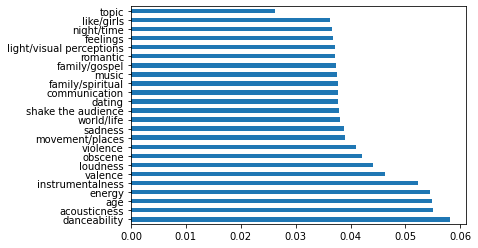

In [31]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split     #inbuilt function present in the sklearn to split the data set
train_set, test_set = train_test_split(music, test_size=0.2, random_state=42)
print("Rows in the test set:",len(test_set))
print("Rows in the train set:",len(train_set))  

Rows in the test set: 3549
Rows in the train set: 14194


In [33]:
corr_matrix =train_set.corr()
corr_matrix['genre'].sort_values(ascending=False)

genre                       1.000000
energy                      0.189208
loudness                    0.134705
violence                    0.086387
topic                       0.070515
world/life                  0.035356
danceability                0.034385
instrumentalness            0.025611
family/spiritual            0.015813
obscene                     0.013093
shake the audience          0.011683
light/visual perceptions    0.007468
communication               0.006538
like/girls                  0.005372
feelings                    0.002287
night/time                 -0.001967
dating                     -0.009824
sadness                    -0.012795
family/gospel              -0.016400
valence                    -0.017143
romantic                   -0.026915
movement/places            -0.036640
music                      -0.046698
age                        -0.087031
acousticness               -0.204893
Name: genre, dtype: float64

In [34]:
train_labels =train_set["genre"].copy()
train_set = train_set.drop('genre', axis=1)

In [35]:
train_set.shape

(14194, 24)

In [36]:
train_set.describe()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic
count,13503.000000,13509.000000,13474.000000,13471.000000,13485.000000,13437.000000,13484.000000,13492.000000,13489.000000,13530.000000,...,13475.000000,13463.000000,13508.000000,13528.000000,13467.000000,13462.000000,13514.000000,13519.000000,13503.000000,13491.000000
mean,0.045353,0.145923,0.149951,0.079433,0.043286,0.045966,0.704921,1.052647,1.181147,0.896885,...,0.145569,0.054353,0.548370,0.674519,0.363701,0.100907,0.525118,56.045359,0.437832,4.495441
std,0.161459,0.225773,0.222670,0.182961,0.162029,0.161619,1.807368,1.829100,2.243529,1.942909,...,0.220542,0.166631,0.189999,0.135611,0.339635,0.248889,0.265867,25.902926,0.267527,2.012682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000
25%,0.000434,0.001491,0.001751,0.000717,0.000525,0.000977,0.006165,0.015105,0.006644,0.011589,...,0.001016,0.000646,0.425549,0.605297,0.039650,0.000000,0.310124,35.826744,0.200000,3.000000
50%,0.001595,0.004406,0.022037,0.002331,0.001711,0.002591,0.021208,0.045189,0.020524,0.031607,...,0.013040,0.002053,0.551686,0.690698,0.252680,0.001073,0.527273,56.881963,0.442857,5.000000
75%,0.006172,0.252415,0.246750,0.067138,0.012869,0.013513,0.427137,1.518792,1.156970,0.735111,...,0.272491,0.032961,0.673536,0.761801,0.679447,0.010906,0.745429,77.774778,0.657143,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,7.000000


In [37]:
train_set.head()

,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,topic
12033,0.008085,NaN,0.008133,0.005110,0.005022,NaN,0.047441,0.078420,0.057650,0.073636,...,0.003319,0.006913,0.374264,0.702210,0.000000,0.660353,0.744721,63.938941,0.700000,6.0
9620,0.001169,0.000980,0.438800,0.000244,0.000000,0.000679,0.000000,0.015913,0.008725,0.020042,...,0.289693,0.047075,0.689117,0.670798,0.083578,0.000298,0.743692,45.413369,0.542857,7.0
2088,0.001827,0.001750,0.001119,0.000000,0.002772,NaN,0.018151,2.975959,4.090200,0.000000,...,0.000836,0.000000,0.659358,0.709475,NaN,0.002663,0.838572,74.002416,0.142857,3.0
1398,0.002767,0.494945,0.005498,0.003314,0.003980,0.006662,0.846838,0.043026,0.051956,0.040941,...,0.003677,0.002236,0.472349,0.657617,0.965319,NaN,0.248726,22.731576,0.014286,6.0
12633,0.001567,0.556096,0.002430,0.000982,0.000574,0.002342,0.051680,0.058613,0.024689,0.050787,...,0.004041,0.002789,0.363056,0.639868,0.567336,0.182003,0.401437,71.905044,0.557143,6.0


In [38]:
from sklearn.impute import SimpleImputer  
imputer = SimpleImputer(strategy = "median")
# imputer.fit(train_set)

In [39]:
#imputer.statistics_  

In [40]:
#X =imputer.transform(train_set)

In [41]:
#train_set = pd.DataFrame(X, columns=train_set.columns)

In [42]:
#train_set.describe()

In [43]:
#train_set.head()

## creating the pipeline to get the data after processing i.e. after imputing and scaling

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('std_scaler', StandardScaler())])

In [46]:
music_tr = my_pipeline.fit_transform(train_set)

In [47]:
music_tr.shape

(14194, 24)

In [48]:
music_df = pd.DataFrame(music_tr)

In [49]:
#music_df.describe()

In [50]:
#train_labels

In [51]:
#train_set

In [52]:
#music_df

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
#from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors = 5)
#model = KNeighborsClassifier(n_neighbors = 23)
#model = KNeighborsClassifier(n_neighbors = 24)
#from sklearn.svm import SVC
#model = SVC(kernel="linear")
from sklearn.ensemble import RandomForestClassifier
RForest_model = RandomForestClassifier(n_estimators=100)
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

In [54]:
# k_range = range(1, 31)
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(music_tr, train_labels)
#     y_pred = knn.predict(X_test_prepared)
#     scores.append(accuracy_score(Y_test, y_pred))
    
# # plot the relationship between K and testing accuracy
# plt.plot(k_range, scores, color="green")
# plt.xlabel("K-Value")
# plt.ylabel("Accuracy Score") 

In [55]:
model.fit(music_tr, train_labels)

ExtraTreesClassifier()

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, music_tr,train_labels, scoring="neg_mean_squared_error" , cv=10 )
rmse_scores = py.sqrt(-scores)

In [57]:
rmse_scores

array([2.32787759, 2.41240923, 2.38289089, 2.35569433, 2.41457286,
       2.38698019, 2.42273121, 2.32763827, 2.40667969, 2.34723534])

In [58]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ",scores.std())

In [59]:
print_scores(rmse_scores)

Scores: [2.32787759 2.41240923 2.38289089 2.35569433 2.41457286 2.38698019
 2.42273121 2.32763827 2.40667969 2.34723534]
Mean:  2.378470960234962
Standard deviation:  0.03455414257476141


## Testing of the model on the test set i have seperated from the total train set given

In [61]:
X_test = test_set.drop('genre', axis=1)
Y_test = test_set['genre'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

print(final_predictions)
#print(list(Y_test))

[1 3 6 ... 3 4 1]


In [62]:
acc_LR = accuracy_score(Y_test,final_predictions)
classification_report_LR = classification_report(Y_test,final_predictions)
confusion_matrix_LR = confusion_matrix(Y_test,final_predictions)



print('Accuracy :', acc_LR,'\n')
print('Classification Report :\n',classification_report_LR,'\n')

Accuracy : 0.39363200901662443 

Classification Report :
               precision    recall  f1-score   support

           0       0.35      0.21      0.26       604
           1       0.38      0.54      0.45       657
           2       0.56      0.40      0.47       120
           3       0.49      0.38      0.43       454
           4       0.36      0.47      0.41       890
           5       0.46      0.38      0.42       327
           6       0.39      0.30      0.34       497

    accuracy                           0.39      3549
   macro avg       0.43      0.38      0.40      3549
weighted avg       0.40      0.39      0.39      3549
 



In [63]:

featureScores = pd.DataFrame(final_predictions)
featureScores.columns = ['genre']

In [64]:
featureScores

,genre
0,1
1,3
2,6
3,4
4,3
...,...
3544,4
3545,6
3546,3
3547,4


## Reading and fitting the original test set to get the predicted value

In [65]:
music_sub = pd.read_csv("music_test.csv")

In [66]:
id1 = pd.DataFrame(music_sub['id'])

In [67]:
id1

,id
0,17743
1,17744
2,17745
3,17746
4,17747
...,...
5909,23652
5910,23653
5911,23654
5912,23655


In [68]:
music_sub = music_sub.drop('id', axis=1)

In [69]:
music_sub = music_sub.drop('release_date', axis=1)

In [70]:

X1_test_prepared = my_pipeline.transform(music_sub)
final_predictions1 = model.predict(X1_test_prepared)

h=pd.DataFrame(final_predictions1)
h.columns = ['genre']
print(h)


      genre
0         1
1         2
2         4
3         5
4         3
...     ...
5909      1
5910      3
5911      6
5912      1
5913      4

[5914 rows x 1 columns]


In [71]:
featureScores1 = pd.concat([id1,h],axis=1 )
featureScores1.columns = ['id','genre']

In [72]:
featureScores1.describe()

,id,genre
count,5914.000000,5914.000000
mean,20699.500000,2.988164
std,1707.369077,1.873163
min,17743.000000,0.000000
25%,19221.250000,1.000000
50%,20699.500000,4.000000
75%,22177.750000,4.000000
max,23656.000000,6.000000


In [73]:
featureScores1.head()

,id,genre
0,17743,1
1,17744,2
2,17745,4
3,17746,5
4,17747,3


## Writing the output i.e. predicted genre of the music in  the finalsubmission.csv file

In [76]:
featureScores1.to_csv('finalsubmission.csv')